In [102]:
### import libraries
import numpy as np; np.set_printoptions(precision=2)
import pandas as pd; pd.options.display.float_format = "{:,.2f}".format
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt

### Part 1: Introduction
1. Describe the dataset you chose. Why did you choose it? What features does it include? What year is it from? How was it collected? What should we know about this dataset as we read your writeup?

2. Define a research question.

3. Why is this algorithm a good way of answering your research question? 

### Part 2: Coding

4. Using the data you chose and the algorithm you chose, read in your data and run your model. 

In [103]:
### load data
churn = pd.read_csv('/Users/weijiaying/Desktop/IMT574-Project/Churn_Modelling.csv')
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.10",0


In [104]:
### data sanity check
churn.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [105]:
### drop any non-predictive features 
churn_X = churn.drop(columns=[
    "RowNumber", 
    "CustomerId", 
    "Surname", 
    "Exited"
])

churn_y = churn["Exited"]

In [106]:
### encode dummy variables 
churn_X = pd.get_dummies(
    churn_X,
    columns=["Geography", "Gender"],
    drop_first=True
)

In [107]:
### split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    churn_X,
    churn_y,
    test_size=0.2,
    random_state=42
)

In [108]:
### train a random forest classifier
np.random.seed(574)
rf = RandomForestClassifier(
    n_estimators=1000,       # number of trees
    max_depth=10,           # depth of each tree
    min_samples_leaf=20,    # minimum samples per leaf node
    max_features="sqrt",    # random feature selection
    class_weight="balanced", # maintain class balance
    random_state=42 
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)
y_prob = rf.predict_proba(X_val)[:, 1]

5. Conduct a hyperparameter sensitivity analysis by systematically varying key model parameters and measuring their impact on model performance. You only need to do this for one hyperparameter if your selected algorithm has multiple.

6. Report the evaluation of your model. Either through RMSE, F1 score, or another metric. How did accuracy/evaluation change with hyperparameter selection? 

In [109]:
print(classification_report(y_val, y_pred))
print("ROC-AUC:", roc_auc_score(y_val, y_prob))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      1607
           1       0.54      0.77      0.64       393

    accuracy                           0.83      2000
   macro avg       0.74      0.80      0.76      2000
weighted avg       0.86      0.83      0.84      2000

ROC-AUC: 0.8679663241765115


7. Create a visualization demonstrating your findings. Make sure to include a title and axis labels. Describe what’s being shown in your visualization.

In [110]:
###  confusion matrix of churn prediction
cm = confusion_matrix(y_val, y_pred)
cm = pd.DataFrame(cm, 
                 index = ['Actual: No Churn (0)', 'Actual: Churn (1)'],
                 columns = ['Predict: No Churn (0)', 'Predict: Churn (1)'])
cm

,Predict: No Churn (0),Predict: Churn (1)
Actual: No Churn (0),1353,254
Actual: Churn (1),92,301


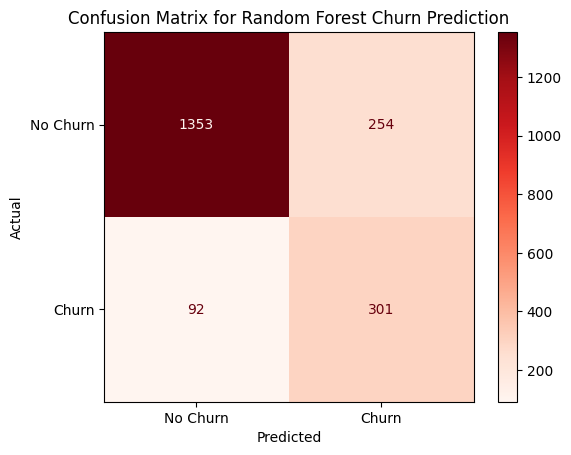

In [111]:
### visualize confusion matrix of churn prediction
cm = confusion_matrix(y_val, y_pred)
cm = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=['No Churn', 'Churn'])
cm.plot(cmap="Reds")
plt.title('Confusion Matrix for Random Forest Churn Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

8. What challenges did you run into? Do you think it was because of the data, the model, the research question? How would you overcome these challenges? 

9. Explain how your machine learning solution answers the research question you defined. Describe the risks and advantages of applying your solution to unseen data. What are the consequences of your solution being wrong? What are advantages when it is right?  What are some negative and positive societal impacts from your model?

10. Name one research question you might ask next for future work (don’t worry, you don’t have to do it!) Why is it important? 

11. Create a Model CardLinks to an external site. for your project. You can read more about Model Cards hereLinks to an external site., with examples. Insert this as an image in your Jupyter Notebook. Keep it succinct as possible, it is meant to be a short summary.

12. for Jupyter Notebook presentation. Make sure your headings are legible, your answers are clear, and that it’s easy to read!

### Reference

Random Forest Algorithm in Machine Learning: https://www.geeksforgeeks.org/machine-learning/random-forest-algorithm-in-machine-learning/




AUC ROC Curve in Machine Learning: https://www.geeksforgeeks.org/machine-learning/auc-roc-curve/

Confusion Matrix Display: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html